In [270]:
#imports
import numpy as np
import matplotlib.pyplot as plt

In [142]:
# test_code
# arr = np.array([range(10),range(10),range(10),range(10)])
# arr = np.transpose(arr)
# print(arr.shape[1])
# sum = np.sum(arr, axis = 1)
# sum = np.transpose(sum)
# print(sum)
#network_dimensions = np.array([5, 5])
#print(network_dimensions)
a = np.arange(0,60,5)
print(type(a))
#a = a.reshape(3,4)

print(a)
print('\n')

for x in np.nditer(a):
     print(x)

<class 'numpy.ndarray'>
[ 0  5 10 15 20 25 30 35 40 45 50 55]


0
5
10
15
20
25
30
35
40
45
50
55


In [281]:
class SOM:
    def __init__(self, weight_dim, data):
        self.weights = np.random.rand(weight_dim[0], weight_dim[1])
        self.data = data
        
    def train_network(self, iterations, eta, data_type):
        for epoch in range(iterations):
            new_weights = self.update_weights(self.data, self.weights, epoch, eta, data_type)
            
        return new_weights
        
        
    def update_weights(self, input_data, input_weights, epoch, eta, data_type):
        for i in range(input_data.shape[0]):
            data_row = input_data[i, :]
            winner = self.calculate_winner(data_row, input_weights)
            #print(winner)
            if data_type is 'animal' or 'votes':
                nbrhd = self.find_neighbourhood(winner, input_weights.shape[0], epoch)
            elif data_type is 'tour':
                nbrhd = self.find_cyclic_neighbourhood(winner, epoch)
#             elif data_type is 'votes':
#                 nbrhd = self.find_neighbourhood(winner, epoch)
                
            input_weights[nbrhd, :] = input_weights[nbrhd, :] + eta * (data_row - input_weights[nbrhd])
              
        return input_weights
            
                  
    def calculate_winner(self, data_row, weights_input):
        most_similar = self.distance(data_row, weights_input[0, :])
        most_similar_index = 0
        for j in range(weights_input.shape[0]):
            sim_dis = self.distance(data_row, weights_input[j, :])
            if(sim_dis > most_similar):
                most_similar = sim_dis
                most_similar_index = j

        return most_similar_index
    
    
    def distance(self, x, y):
        dis = np.dot((x-y).T, x-y)
        return dis
    
    
    # 1 D neighbourhood for animal data
    def find_neighbourhood(self, winner_node, max_range, epoch):
        nbrhd_range = int(max_range/2 - epoch*2.5)
        nbrhd_min = np.max([0, winner_node-nbrhd_range])
        nbrhd_max = np.min([max_range, winner_node+nbrhd_range])
        return np.arange(nbrhd_min, nbrhd_max)


    # Circular neighbourhood for tour data
    def find_cyclic_neighbourhood(self, winner_node_circular, epoch):
        nbrhd_range = int(2 - (epoch)//10)
        neighbors_list = [winner_node_circular]
        if(nbrhd_range==2):
            if(winner_node_circular-nbrhd_range < 0):
                neighbors_list.append(winner_node_circular-1)
                neighbors_list.append(winner_node_circular+1)
            elif(winner_node_circular+nbrhd_range >= 10):
                neighbors_list.append(0)    
                neighbors_list.append(winner_node_circular-1)
            else : 
                neighbors_list.append(winner_node_circular-1)
                neighbors_list.append(winner_node_circular+1)
        if(nbrhd_range==1):
            if(winner_node_circular+nbrhd_range > 10):
                neighbors_list.append(0)
            else:
                if(winner_node_circular==9):
                    i=-1
                else:
                    i=np.random.choice([-1,1])
                neighbors_list.append(winner_node_circular+i)  
                
                
        return neighbors_list
    
    
    # Manhanttan neighbourhood for MPs data
#     def find_manhattan_neighbourhood(self, winner_node_mps, epoch):
        
        
    
    
    #Animal reordering
    def find_reordered_animals(self, trained_weights, animal_data, animal_names):
        ordered_animals = []
        for i in range(animal_data.shape[0]):
            ordered_animal = animal_data[i, :]
            ordered_winner = self.calculate_winner(ordered_animal, trained_weights)
            ordered_animals.append([ordered_winner, animal_names[i]])
            
        ordered_animals = np.array(ordered_animals, dtype = object)
        ordered_animals = ordered_animals[ordered_animals[:,0].argsort()]
            
            
        return ordered_animals
    
    
    #Cities reordering
    def find_reordered_cities(self, trained_city_weights, city_data):
        ordered_cities = []
        for i in range(city_data.shape[0]):
            ordered_city = city_data[i, :]
            ordered_city_winner = self.calculate_winner(ordered_city, trained_city_weights)
            ordered_cities.append([ordered_city_winner, i])
            #ordered_cities.append(ordered_city_winner)
            
        ordered_cities = np.array(ordered_cities, dtype = object)
        ordered_cities = ordered_cities[ordered_cities[:,0].argsort()]
            
            
        return ordered_cities
    
        
    

### Topological ordering of animal Species

In [279]:
#animal_data - 1
animal_data = np.loadtxt("data_lab2/animals.dat", dtype='i', delimiter=',')
animal_names = np.loadtxt("data_lab2/animalnames.txt", dtype=str) # names of 32 animals

animal_data = np.reshape(animal_data, (32, 84)) # each row corresponds to one animal , 32 animals in total

#print(animal_names)

In [22]:
som = SOM((100, 84), animal_data)
trained_weights = som.train_network(20, 0.2, 'animal')
#print(np.shape(trained_weights))
reordered_animals = som.find_reordered_animals(trained_weights, animal_data, animal_names)
print(reordered_animals)

[[3 "'crocodile'"]
 [3 "'seaturtle'"]
 [3 "'lion'"]
 [12 "'bat'"]
 [12 "'kangaroo'"]
 [12 "'elephant'"]
 [12 "'dog'"]
 [17 "'horse'"]
 [17 "'bear'"]
 [21 "'housefly'"]
 [21 "'dragonfly'"]
 [21 "'moskito'"]
 [21 "'butterfly'"]
 [21 "'beetle'"]
 [21 "'grasshopper'"]
 [61 "'rat'"]
 [68 "'pig'"]
 [68 "'antelop'"]
 [68 "'ape'"]
 [69 "'pelican'"]
 [69 "'penguin'"]
 [71 "'cat'"]
 [71 "'skunk'"]
 [74 "'hyena'"]
 [83 "'giraffe'"]
 [83 "'rabbit'"]
 [83 "'camel'"]
 [84 "'ostrich'"]
 [89 "'walrus'"]
 [90 "'frog'"]
 [90 "'duck'"]
 [99 "'spider'"]]


### Cyclic Tour

In [240]:
#Cities data
cities_data = np.loadtxt("data_lab2/cities.dat", delimiter = ',', dtype = float, comments = '%')
#print(cities_data)

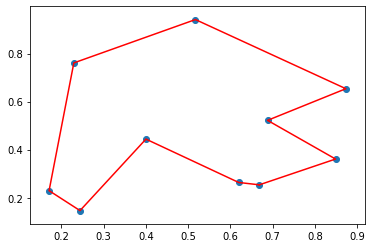

In [253]:
som_city = SOM((10, 2), cities_data)
trained_weights_cities = som_city.train_network(20, 0.2, 'tour')
final_tour = []
reordered_cities = som_city.find_reordered_cities(trained_weights_cities, cities_data)
reordered_cities = reordered_cities[:, 1].tolist()
for n in reordered_cities:
    final_tour.append(cities_data[n])

final_tour.append(final_tour[0])
final_tour = np.array(final_tour)
#print(final_tour)
plt.scatter(cities_data[:, 0], cities_data[:, 1])
plt.plot(final_tour[:, 0], final_tour[:, 1], color = 'red')

### Vote of MPs

In [282]:
#MP data
votes_data = np.loadtxt("data_lab2/votes.dat", dtype=float, delimiter=',')
mp_names = np.loadtxt("data_lab2/mpnames.txt", dtype = str, delimiter = '\n') #names of 349 MPs

votes_data = np.reshape(votes_data, (349, 31))
#print((votes_data))
#print(np.shape(mp_names))

In [285]:
som_mps = SOM((100,31), votes_data)
trained_weights_mps = som_mps.train_network(20, 0.2, 'votes')
print(np.shape(trained_weights_mps))

(100, 31)
